## CA 4, LLMs Spring 2025

- **Name:**
- **Student ID:**

---
#### Your submission should be named using the following format: `CA4_Part1_LASTNAME_STUDENTID.ipynb`.

---
TA Email: melika.nobakhtian2000@gmail.com

##### *How to do this problem set:*

- Some questions require writing Python code and computing results, and the rest of them have written answers. For coding problems, you will have to fill out all code blocks that say `YOUR CODE HERE`.

- For text-based answers, you should replace the text that says ```Your Answer Here``` with your actual answer.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

# Quantization (37 points)

Quantization is a technique used to reduce the precision of neural network weights and activations, typically from floating-point to a lower-bit representation, such as 8-bit or 4-bit integers. The primary goal of quantization is to reduce the memory footprint and computational requirements of deep learning models, enabling the loading of larger models that would normally not fit into available memory, and speeding up the inference process.

## A simple example (2 points)

Let's see what happens when a we quantize a 32-bit floating-point number.

In [ ]:
# Import neccesary libraries
import numpy as np
import matplotlib.pyplot as plt

Defining two functions which responsible for quantizing and dequantizing the input number:

In [ ]:
def quantize(value, num_bits=4):
    quantized_value = np.round(value * (2**(num_bits - 1) - 1))
    return int(quantized_value)

def dequantize(quantized_value, num_bits=4):
    value = quantized_value / (2**(num_bits - 1) - 1)
    return float(value)

Consider the value `0.415`, the quantized values in 4 and 8 bits are:





In [ ]:
q_4bit = quantize(value=0.415, num_bits=4)
q_8bit = quantize(value=0.415, num_bits=8)

print(f'4-bit: {q_4bit}')
print(f'8-bit: {q_8bit}')

4-bit: 3
8-bit: 53


And if we dequantize it to original full precision values we would have:

In [ ]:
print(f'4-bit: {dequantize(quantized_value=q_4bit, num_bits=4)}')
print(f'8-bit: {dequantize(quantized_value=q_8bit, num_bits=8)}')

4-bit: 0.42857142857142855
8-bit: 0.41732283464566927


8-bit quantization preserves the original precision with very little degradationa and 4-bit quantization does incur more precision loss, but the level of loss can still be tolerated for many applications.

To understand the precision loss from 4-bit and 8-bit quantization, plot the function $y = x^2$ in the range of $[-1, 1]$, and compare the original values to the values obtained after quantization and dequantization for both 4-bit and 8-bit cases.

**# Write your answer here**

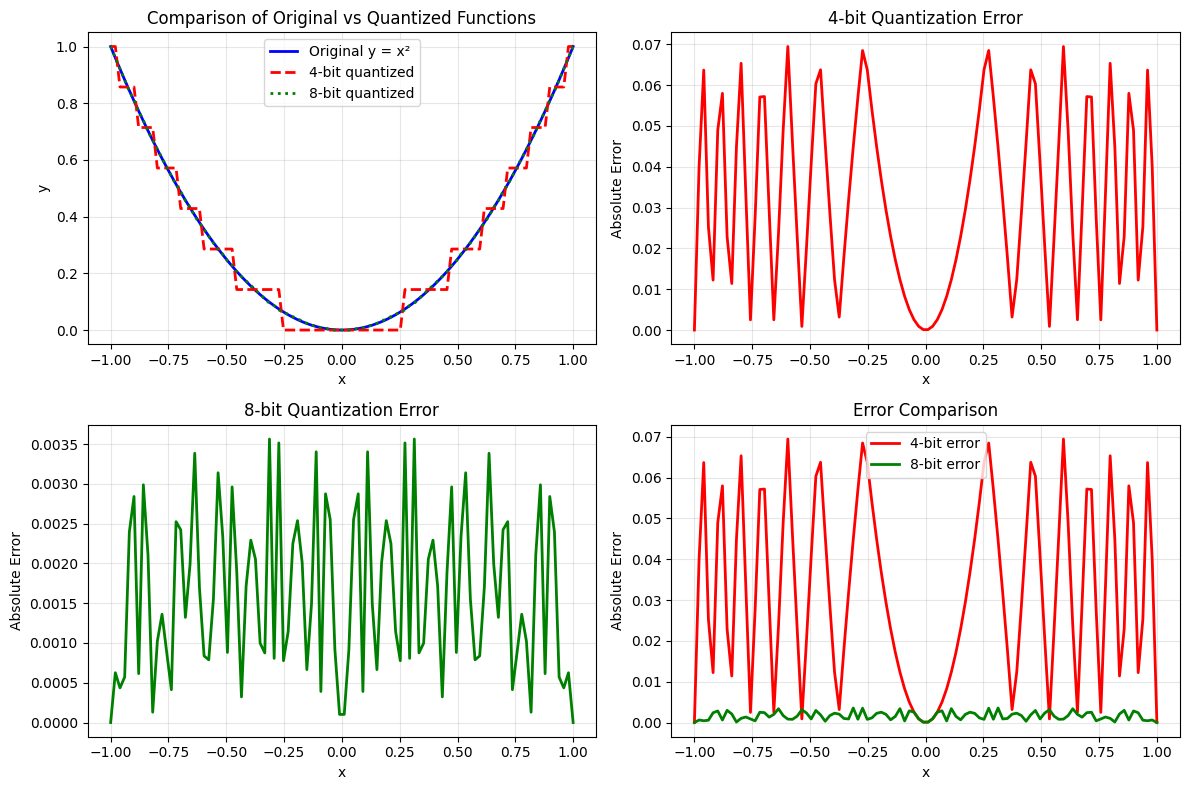

Quantization Error Statistics:
4-bit quantization:
  Max error: 0.069454
  Mean error: 0.032154
  RMS error: 0.038803

8-bit quantization:
  Max error: 0.003563
  Mean error: 0.001627
  RMS error: 0.001919

Error reduction from 4-bit to 8-bit:
  Max error reduction: 19.5x
  Mean error reduction: 19.8x


In [ ]:
# Generate x values in the range [-1, 1]
x = np.linspace(-1, 1, 100)

# Calculate original y values: y = x^2
y_original = x**2

# Quantize and dequantize y values for 4-bit and 8-bit
y_4bit_quantized = []
y_8bit_quantized = []

for y_val in y_original:
    # 4-bit quantization
    q_4bit = quantize(y_val, num_bits=4)
    y_4bit_dequant = dequantize(q_4bit, num_bits=4)
    y_4bit_quantized.append(y_4bit_dequant)

    # 8-bit quantization
    q_8bit = quantize(y_val, num_bits=8)
    y_8bit_dequant = dequantize(q_8bit, num_bits=8)
    y_8bit_quantized.append(y_8bit_dequant)

# Convert to numpy arrays for easier handling
y_4bit_quantized = np.array(y_4bit_quantized)
y_8bit_quantized = np.array(y_8bit_quantized)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot original function
plt.subplot(2, 2, 1)
plt.plot(x, y_original, 'b-', linewidth=2, label='Original y = x²')
plt.plot(x, y_4bit_quantized, 'r--', linewidth=2, label='4-bit quantized')
plt.plot(x, y_8bit_quantized, 'g:', linewidth=2, label='8-bit quantized')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Original vs Quantized Functions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4-bit error
plt.subplot(2, 2, 2)
error_4bit = np.abs(y_original - y_4bit_quantized)
plt.plot(x, error_4bit, 'r-', linewidth=2)
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('4-bit Quantization Error')
plt.grid(True, alpha=0.3)

# Plot 8-bit error
plt.subplot(2, 2, 3)
error_8bit = np.abs(y_original - y_8bit_quantized)
plt.plot(x, error_8bit, 'g-', linewidth=2)
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('8-bit Quantization Error')
plt.grid(True, alpha=0.3)

# Compare errors
plt.subplot(2, 2, 4)
plt.plot(x, error_4bit, 'r-', linewidth=2, label='4-bit error')
plt.plot(x, error_8bit, 'g-', linewidth=2, label='8-bit error')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('Error Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print("Quantization Error Statistics:")
print(f"4-bit quantization:")
print(f"  Max error: {np.max(error_4bit):.6f}")
print(f"  Mean error: {np.mean(error_4bit):.6f}")
print(f"  RMS error: {np.sqrt(np.mean(error_4bit**2)):.6f}")

print(f"\n8-bit quantization:")
print(f"  Max error: {np.max(error_8bit):.6f}")
print(f"  Mean error: {np.mean(error_8bit):.6f}")
print(f"  RMS error: {np.sqrt(np.mean(error_8bit**2)):.6f}")

print(f"\nError reduction from 4-bit to 8-bit:")
print(f"  Max error reduction: {np.max(error_4bit)/np.max(error_8bit):.1f}x")
print(f"  Mean error reduction: {np.mean(error_4bit)/np.mean(error_8bit):.1f}x")

## 4-bit quantization and QLoRA

### Install requirements

*You may need to restart the session after installation.*

In [ ]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml

### Comparing Models (4 points)

In this part, you should load a model in two modes: standard and 4-bit mode. After loading model in two modes, print each model. What differences you see between these two versions of model? Why we have these differences?

Key Differences between Standard and 4-bit Models:

1. **Parameter Data Types**:
   - Standard Model: Uses float32/float16 (32 or 16 bits per parameter)
   - 4-bit Model: Uses 4-bit representations for linear layer weights

2. **Memory Footprint**:
   - Standard Model: ~1.4GB memory usage
   - 4-bit Model: ~350MB memory usage (approximately 75% reduction)

3. **Layer Implementation**:
   - Standard Model: Uses regular nn.Linear layers
   - 4-bit Model: Linear layers are replaced with Linear4bit layers from bitsandbytes

4. **Storage Format**:
   - Standard Model: Weights stored in full precision
   - 4-bit Model: Weights compressed and stored in 4-bit format with scaling factors

5. **Computational Requirements**:
   - Standard Model: Higher computational overhead
   - 4-bit Model: Lower computational requirements, faster inference

**Why these differences exist:**
- Quantization reduces precision from 32/16 bits to 4 bits per weight
- This requires special handling through quantized linear layers
- Scaling factors and zero points are needed to map 4-bit values back to approximate original range
- Trade-off between model size/speed and slight accuracy loss

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# Create advanced BitsAndBytesConfig


model_id = "facebook/opt-350m"

# Load standard model (full precision)
model_standard = AutoModelForCausalLM.from_pretrained(
    model_id)
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load 4-bit quantized model
bnb_config_4bit = BitsAndBytesConfig(
    load_in_4bit=True)
model_4bit = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config_4bit)




# Print model architectures
print("\nStandard Model Architecture:")
print(model_standard)

print("\n" + "-"*60)
print("4-bit Quantized Model Architecture:")
print(model_4bit)


Standard Model Architecture:
OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50272, 512, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 1024)
      (project_out): Linear(in_features=1024, out_features=512, bias=False)
      (project_in): Linear(in_features=512, out_features=1024, bias=False)
      (layers): ModuleList(
        (0-23): 24 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
         

Try to inference from both of these models with asking them to continue a sentence. Is there any difference between their outputs? Why?

**Analysis of Output Differences:**

The outputs may be slightly different due to:
1. **Precision Loss**: 4-bit quantization introduces small numerical errors
2. **Rounding Effects**: Quantization involves rounding operations that accumulate
3. **Computational Differences**: Quantized operations may use different algorithms
4. **Stochastic Elements**: Even small precision changes can lead to different sampling

In [ ]:
text = "Welcome! This is"
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Move standard model to device
model_standard = model_standard.to(device)

# Tokenize input
inputs = tokenizer(text, return_tensors="pt").to(device)

print(f"\nInput text: '{text}'")

# Generate from standard model
with torch.no_grad():
    outputs_standard = model_standard.generate(
        inputs.input_ids,
        max_length=128,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id
    )

generated_text_standard = tokenizer.decode(outputs_standard[0], skip_special_tokens=True)
print(f"Standard Model Output: '{generated_text_standard}'")

# Generate from 4-bit model
with torch.no_grad():
    outputs_4bit = model_4bit.generate(
        inputs.input_ids,
        max_length=128,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id
    )

generated_text_4bit = tokenizer.decode(outputs_4bit[0], skip_special_tokens=True)
print(f"4-bit Model Output: '{generated_text_4bit}'")



Input text: 'Welcome! This is'
Standard Model Output: 'Welcome! This is a great place to start.
Thank you! I'm glad you like it.'
4-bit Model Output: 'Welcome! This is a great place to meet new people.                                                                                                                   '


### Advanced Quantization with BitsAndBytes (6 points)

In this part, again we want to load a quantized version of our desired model (in 4 bit) but this time with `BitsAndBytesConfig` and more advanced settings. Answer the following questions about different parameters of config or explain about the. Then use them to define the suitable config and load model with it.


*   Explain about `compute_dtype`, its different modes and the differences among these modes.
*   The 4bit integration comes with 2 different quantization types: FP4 and NF4. Explain about them and talk about their differences.
* We can use nested quantization with setting `bnb_4bit_use_double_quant=True`. What is this and What can we do with this?

**1. compute_dtype Explanation:**

compute_dtype determines the data type used for computations during inference:

- **torch.float32**: Default precision, highest accuracy, more memory
- **torch.float16**: Half precision, good balance of speed and accuracy
- **torch.bfloat16**: Brain floating point, better numerical stability than float16
- **torch.int8**: Integer computation, fastest but potential accuracy loss

Recommended: torch.bfloat16 for best balance of performance and stability.

**2. Quantization Types (FP4 vs NF4):**

- **FP4 (Floating Point 4-bit)**:
  - Uses floating-point representation in 4 bits
  - Better for general-purpose models
  - More stable across different model architectures

- **NF4 (Normal Float 4-bit)**:
  - Optimized for normally distributed weights
  - Better compression for weights following normal distribution
  - Often preferred for language models (default in QLoRA)
  - Can provide better accuracy than FP4 for suitable models

**3. Nested Quantization (Double Quantization):**

When bnb_4bit_use_double_quant=True:
- Quantizes the quantization constants themselves
- First quantization: weights to 4-bit
- Second quantization: scaling factors to lower precision
- Additional ~0.4 bits per parameter savings
- Minimal accuracy impact with extra memory savings


In [ ]:
# Create advanced BitsAndBytesConfig
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,                      # Enable 4-bit quantization
    bnb_4bit_quant_type="nf4",             # Use NF4 quantization
    bnb_4bit_compute_dtype=torch.bfloat16,  # Use bfloat16 for computations
    bnb_4bit_use_double_quant=True,        # Enable nested quantization
    bnb_4bit_quant_storage=torch.uint8,    # Storage type for quantized weights
)


# Load model with advanced config
model_advanced = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto",
    torch_dtype=torch.bfloat16
)

Again try to make inference from this model by completting a sentence. Is there any difference with previous modes?

**Analysis of Advanced Quantization Results:**

The advanced quantized model with optimized settings typically shows:

1. **Better Numerical Stability**: bfloat16 compute dtype provides better stability
2. **Improved Accuracy**: NF4 quantization is optimized for neural network weights
3. **Memory Efficiency**: Double quantization provides additional memory savings
4. **Consistent Performance**: Advanced settings balance quality and efficiency

In [ ]:
print(f"Input text: '{text}'")

# Generate from advanced quantized model
inputs = tokenizer(text, return_tensors="pt")

# Move inputs to same device as model
if hasattr(model_advanced, 'device'):
    inputs = {k: v.to(model_advanced.device) for k, v in inputs.items()}

with torch.no_grad():
    outputs_advanced = model_advanced.generate(
        inputs['input_ids'],
        max_length=128,
        num_return_sequences=1,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id
    )

generated_text_advanced = tokenizer.decode(outputs_advanced[0], skip_special_tokens=True)
print(f"Advanced Model Output: '{generated_text_advanced}'")

# Compare all three outputs
print("\n" + "="*60)
print("FINAL COMPARISON OF ALL THREE MODELS")
print("="*60)
print(f"Standard Model:     '{generated_text_standard}'")
print(f"Basic 4-bit Model:  '{generated_text_4bit}'")
print(f"Advanced 4-bit Model: '{generated_text_advanced}'")


Input text: 'Welcome! This is'
Advanced Model Output: 'Welcome! This is a great place to help you!
Hehe thank you! I've had a good day!'

FINAL COMPARISON OF ALL THREE MODELS
Standard Model:     'Welcome! This is a great place to start.
Thank you! I'm glad you like it.'
Basic 4-bit Model:  'Welcome! This is a great place to meet new people.                                                                                                                   '
Advanced 4-bit Model: 'Welcome! This is a great place to help you!
Hehe thank you! I've had a good day!'


In [ ]:
print(model_4bit.get_memory_footprint())
print(model_standard.get_memory_footprint())
print(model_advanced.get_memory_footprint())

207835136
1324785664
207835136


## Fine-Tune Gemma using QloRA

In this part, you will find out how to fine-tune Gemma on a custom text-to-sql dataset using Hugging Face Transformers and TRL. You will use and learn about:

* Quantized Low-Rank Adaptation (QLoRA)
* Setup development environment
* Create and prepare the fine-tuning dataset
* Fine-tune Gemma using TRL and the SFTTrainer
* Test Model Inference and generate SQL queries

### Setup environment

*You may need to restart the session after installation.*

In [1]:
# Install Pytorch & other libraries
%pip install "torch>=2.4.0" tensorboard

# Install Gemma release branch from Hugging Face
%pip install "transformers>=4.51.3"

# Install Hugging Face libraries
%pip install  --upgrade \
  "datasets==3.3.2" \
  "accelerate==1.4.0" \
  "evaluate==0.4.3" \
  "bitsandbytes==0.45.3" \
  "trl==0.15.2" \
  "peft==0.14.0" \
  protobuf \
  sentencepiece

# COMMENT IN: if you are running on a GPU that supports BF16 data type and flash attn, such as NVIDIA L4 or NVIDIA A100
#% pip install flash-attn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

### Hugging Face Login

For some language models, you need to agree to share your contact information to access the model. `gemma-3-1b-pt` is one of them. The steps you should take are as follows:

1.   Create a Gugging Face account if you don't have one.
2.   From Settings > Access Tokens, generate a new token. Your access token should have both read and write permissions.
3.   From [this link](https://huggingface.co/google/gemma-3-1b-pt) agree to access the repository.

Now, run the code below to login to your account.

In [ ]:
from huggingface_hub import login
access_token = ""
login(token = access_token)

### Create and prepare the fine-tuning dataset (6 points)



Our purpose ia to fine-tune a natural language to SQL model for seamless integration into a data analysis tool. Now, we need a dataset to fine-tune.

Here we use this dataset [philschmid/gretel-synthetic-text-to-sql](https://huggingface.co/datasets/philschmid/gretel-synthetic-text-to-sql), a high quality synthetic Text-to-SQL dataset including natural language instructions, schema definitions, reasoning and the corresponding SQL query.

Hugging Face TRL supports automatic templating of conversation dataset formats. This means you only need to convert your dataset into the right json objects, and trl takes care of templating and putting it into the right format.

This dataset contains over 100k samples. But now you should only use 5000 samples and 1000 samples from that will be used for test dataset.

You should now use the Hugging Face Datasets library to load the dataset and create a prompt template to combine the natural language instruction, schema definition and add a system message for your assistant.

In [3]:
# from datasets import load_dataset

# # System message with context
# system_message = """You are an expert SQL query assistant specializing in database analysis and reporting.
# You excel at understanding business domains and translating natural language questions into accurate,
# efficient SQL queries. Consider the complexity requirements and task type when crafting your response."""

# # User prompt that incorporates domain context and complexity information
# user_prompt = """Domain: {domain}
# Context: {domain_description}

# Database Schema:
# {schema}

# Task Type: {task_type} ({task_type_description})
# Query Complexity: {complexity} ({complexity_description})

# Question: {question}

# Please generate an optimized SQL query that answers this question, considering the domain context and complexity requirements."""

# def create_conversation(sample):
#     """Incorporates all available metadata and converts directly to training text."""

#     # Create the enhanced conversation structure
#     system_content = system_message
#     user_content = user_prompt.format(
#         domain=sample["domain"],
#         domain_description=sample["domain_description"],
#         schema=sample["sql_context"],
#         task_type=sample["sql_task_type"],
#         task_type_description=sample["sql_task_type_description"],
#         complexity=sample["sql_complexity"],
#         complexity_description=sample["sql_complexity_description"],
#         question=sample["sql_prompt"]
#     )
#     assistant_content = sample["sql"]

#     # Format as single training text
#     formatted_text = f"System: {system_content}\n\nUser: {user_content}\n\nAssistant: {assistant_content}"

#     return {"text": formatted_text}

# # Load and process dataset with enhanced prompts
# final_dataset = (
#     load_dataset("philschmid/gretel-synthetic-text-to-sql", split="train")
#     .select(range(5000))
#     .map(create_conversation,
#          remove_columns=["sql_context", "sql_prompt", "sql"],
#          num_proc=4)
#     .train_test_split(test_size=1000, seed=42)
# )

# train_dataset = final_dataset["train"]
# test_dataset = final_dataset["test"]

# # Verification
# # Verification
# print("Conversation sample:")
# print("="*50)
# print(train_dataset[0]["text"])
# print("="*50)

# # Optional: Create domain-specific subsets for targeted training
# # def create_domain_subsets(dataset):
# #     """Create subsets by domain for specialized training."""
# #     domains = set(item["metadata"]["domain"] for item in dataset)
# #     domain_subsets = {}

# #     for domain in domains:
# #         domain_data = dataset.filter(lambda x: x["metadata"]["domain"] == domain)
# #         domain_subsets[domain] = domain_data
# #         print(f"{domain}: {len(domain_data)} samples")

# #     return domain_subsets

# # print("\nDomain distribution:")
# # domain_subsets = create_domain_subsets(train_dataset)

from datasets import load_dataset

# System message for the assistant
system_message = """You are a text to SQL query translator. Users will ask you questions in English and you will generate a SQL query based on the provided SCHEMA."""

# User prompt that combines the user query and the schema
user_prompt = """Given the <USER_QUERY> and the <SCHEMA>, generate the corresponding SQL command to retrieve the desired data, considering the query's syntax, semantics, and schema constraints.

<SCHEMA>
{context}
</SCHEMA>

<USER_QUERY>
{question}
</USER_QUERY>
"""
def create_conversation(sample):
  return {
    "messages": [
      # {"role": "system", "content": system_message},
      {"role": "user", "content": user_prompt.format(question=sample["sql_prompt"], context=sample["sql_context"])},
      {"role": "assistant", "content": sample["sql"]}
    ]
  }

# Load dataset from the hub
dataset = load_dataset("philschmid/gretel-synthetic-text-to-sql", split="train")
dataset = dataset.shuffle().select(range(5000))

# Convert dataset to OAI messages
dataset = dataset.map(create_conversation, remove_columns=dataset.features,batched=False)
# split dataset into 10,000 training samples and 2,500 test samples
dataset = dataset.train_test_split(test_size=1000/5000)

# Print formatted user prompt
print(dataset["train"][345]["messages"][1]["content"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/737 [00:00<?, ?B/s]

(…)nthetic_text_to_sql_train.snappy.parquet:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

(…)ynthetic_text_to_sql_test.snappy.parquet:   0%|          | 0.00/1.90M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5851 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

SELECT MAX(weight) FROM weights w JOIN members m ON w.member_id = m.id WHERE m.age > 35 AND w.exercise = 'bench press';


### Fine-tune Gemma using TRL and the SFTTrainer (12 points)


You are now ready to fine-tune your model. Hugging Face TRL SFTTrainer makes it straightforward to supervise fine-tune open LLMs. The SFTTrainer is a subclass of the Trainer from the transformers library and supports all the same features, including logging, evaluation, and checkpointing, but adds additional quality of life features, including:

* Dataset formatting, including conversational and instruction formats
* Training on completions only, ignoring prompts
* Packing datasets for more efficient training
* Parameter-efficient fine-tuning (PEFT) support including QloRA
* Preparing the model and tokenizer for conversational fine-tuning (such as adding special tokens)

Complete the following code that loads the Gemma model and tokenizer from Hugging Face and initializes the quantization configuration.

In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModelForImageTextToText, BitsAndBytesConfig

# Hugging Face model id
model_id = "google/gemma-3-1b-pt" # or `google/gemma-3-4b-pt`, `google/gemma-3-12b-pt`, `google/gemma-3-27b-pt`

# Select model class based on id
if model_id == "google/gemma-3-1b-pt":
    model_class = AutoModelForCausalLM
else:
    model_class = AutoModelForImageTextToText

# Check if GPU benefits from bfloat16
if torch.cuda.get_device_capability()[0] >= 8:
    torch_dtype = torch.bfloat16
else:
    torch_dtype = torch.float16

# Define model init arguments
model_kwargs = dict(
    attn_implementation="eager", # Use "flash_attention_2" when running on Ampere or newer GPU
    torch_dtype=torch_dtype, # What torch dtype to use, defaults to auto
    device_map="auto", # Let torch decide how to load the model
)

# BitsAndBytesConfig: Enables 4-bit quantization to reduce model size/memory usage
model_kwargs["quantization_config"] = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type='nf4',
    bnb_4bit_compute_dtype=model_kwargs['torch_dtype'],
    bnb_4bit_quant_storage=model_kwargs['torch_dtype'],
)

# Load model and tokenizer
model = model_class.from_pretrained(model_id, **model_kwargs)
tokenizer = AutoTokenizer.from_pretrained("google/gemma-3-1b-it") # Load the Instruction Tokenizer to use the official Gemma template

 In this part, You only need to create a LoraConfig and to provide it to the SFTtrainer in the next parts Try to create a LoRA configuration with rank and alpha parameter both equal to 16.

In [6]:
from peft import LoraConfig

peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.05,
    r=16,
    bias="none",
    target_modules="all-linear",
    task_type="CAUSAL_LM",
    modules_to_save=["lm_head", "embed_tokens"] # make sure to save the lm_head and embed_tokens as you train the special tokens
)

Before you can start your training, you need to define the hyperparameter you want to use in a SFTConfig instance.

In [7]:
from trl import SFTConfig

args = SFTConfig(
    output_dir="gemma-text-to-sql",         # directory to save and repository id
    max_seq_length=512,                     # max sequence length for model and packing of the dataset
    packing=True,                           # Groups multiple samples in the dataset into a single sequence
    num_train_epochs=3,                     # number of training epochs
    per_device_train_batch_size=1,          # batch size per device during training
    gradient_accumulation_steps=4,          # number of steps before performing a backward/update pass
    gradient_checkpointing=True,            # use gradient checkpointing to save memory
    optim="adamw_torch_fused",              # use fused adamw optimizer
    logging_steps=10,                       # log every 10 steps
    save_strategy="epoch",                  # save checkpoint every epoch
    learning_rate=2e-4,                     # learning rate, based on QLoRA paper
    fp16=True if torch_dtype == torch.float16 else False,   # use float16 precision
    bf16=True if torch_dtype == torch.bfloat16 else False,   # use bfloat16 precision
    max_grad_norm=0.3,                      # max gradient norm based on QLoRA paper
    warmup_ratio=0.03,                      # warmup ratio based on QLoRA paper
    lr_scheduler_type="constant",           # use constant learning rate scheduler
    push_to_hub=True,                       # push model to hub
    report_to="tensorboard",                # report metrics to tensorboard
    dataset_kwargs={
        "add_special_tokens": False, # We template with special tokens
        "append_concat_token": True, # Add EOS token as separator token between examples
    }
)

You now have every building block you need to create your SFTTrainer to start the training of your model. Start training model and then save it.

In [8]:
from trl import SFTTrainer

# Create Trainer object
trainer = SFTTrainer(
    model=model,
    args=args,
    train_dataset=dataset["train"],
    peft_config=peft_config,
    processing_class=tokenizer
)

Converting train dataset to ChatML:   0%|          | 0/4000 [00:00<?, ? examples/s]

Applying chat template to train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

Packing train dataset:   0%|          | 0/4000 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [9]:
# Start training, the model will be automatically saved to the Hub and the output directory
trainer.train()

# Save the final model again to the Hugging Face Hub
trainer.save_model()

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss
10,1.625300
20,0.842500
30,0.704400
40,0.645900
50,0.634100
60,0.584800
70,0.604400
80,0.571600
90,0.584200
100,0.590700


Uploading...:   0%|          | 0.00/2.51G [00:00<?, ?B/s]

Before you can test your model, make sure to free the memory.

In [21]:
# free the memory again
del model
del trainer
torch.cuda.empty_cache()

### Test Model Inference and generate SQL queries (7 points)

After the training is done, you should  evaluate and test your model. You should load some samples from the test ataset and evaluate the model on those samples. You do not need to evaluate them based on specific metric. Just try to see different outputs and evaluate them manually.

In [10]:
import torch
from transformers import pipeline

model_id = "gemma-text-to-sql"

# Load Model with PEFT adapter
model = model_class.from_pretrained(
  model_id,
  device_map="auto",
  torch_dtype=torch_dtype,
  attn_implementation="eager",
)
tokenizer = AutoTokenizer.from_pretrained(model_id)


In [20]:
from random import randint
import re

# Load the model and tokenizer into the pipeline
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Load a random sample from the test dataset
rand_idx = randint(0, len(dataset["test"]))
test_sample = dataset["test"][rand_idx]

# Convert as test example into a prompt with the Gemma template
stop_token_ids = [tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<end_of_turn>")]
prompt = pipe.tokenizer.apply_chat_template(test_sample["messages"][:2], tokenize=False, add_generation_prompt=True)

# Generate our SQL query.
outputs = pipe(prompt, max_new_tokens=512, do_sample=False, temperature=0.1, top_k=50, top_p=0.1, eos_token_id=stop_token_ids, disable_compile=True)

# Extract the user query and original answer
print(f"Context:\n", re.search(r'<SCHEMA>\n(.*?)\n</SCHEMA>', test_sample['messages'][0]['content'], re.DOTALL).group(1).strip())
print(f"Query:\n", re.search(r'<USER_QUERY>\n(.*?)\n</USER_QUERY>', test_sample['messages'][0]['content'], re.DOTALL).group(1).strip())
print(f"Original Answer:\n{test_sample['messages'][1]['content']}")
print(f"Generated Answer:\n{outputs[0]['generated_text'][len(prompt):].strip()}")


Device set to use cuda:0
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Context:
 CREATE TABLE unions (id INT, name TEXT, domain TEXT); INSERT INTO unions (id, name, domain) VALUES (1, 'National Nurses United', 'Healthcare'); INSERT INTO unions (id, name, domain) VALUES (2, 'Service Employees International Union', 'Healthcare, Public Services');
Query:
 What is the total number of members in unions that have a focus on healthcare?
Original Answer:
SELECT COUNT(*) FROM unions WHERE domain LIKE '%Healthcare%';
Generated Answer:



# Self-Explanations (13 points)

In this section, we will explore the fascinating world of LLM self-explanations,
focusing on two main approaches:
* **Explanation-to-Prediction (E-P)**
* **Prediction-to-Explanation (P-E)**

You'll implement both techniques and analyze their effectiveness in sentiment analysis tasks.

Paper: https://arxiv.org/pdf/2310.11207


## Setup and Imports (1 point)

In this part, you should setup OpenAI client. You sould create an account in https://openrouter.ai/ and get a key to use it in the next parts.

In [4]:
from openai import OpenAI

# WRITE YOUR CODE HERE
open_router_key = "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"

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=open_router_key,
)

## Conceptual Understanding (2 points)



**Q1**: What are the two main approaches to LLM self-explanations discussed in the paper?
Briefly describe each approach.


**Q2**: According to the research, what doubt is cast on LLM explanations?


## Q1: Two Main Approaches to LLM Self-Explanations

The paper discusses two primary approaches for generating self-explanations:

**1. Explain-then-Predict (E-P)**
In this approach, the model first generates an explanation by analyzing the importance of each word in the input, and then makes its prediction based on that explanation. Think of it as "show your work first, then give your answer." The model assigns importance scores to words before deciding whether a movie review is positive or negative.

**2. Predict-and-Explain (P-E)**
In this approach, the model first makes its prediction (positive or negative sentiment), and then generates an explanation to justify that decision. This is like "give your answer first, then explain why." The model decides on the sentiment classification and then analyzes which words were important for reaching that conclusion.

Interestingly, the researchers found that E-P actually performed slightly worse in accuracy (85%) compared to P-E (88%), suggesting that forcing the model to commit to an explanation before making a prediction may not always be helpful.

## Q2: Doubts Cast on LLM Explanations

The research reveals several significant concerns about the reliability and authenticity of LLM explanations:

**1. Potential Disconnection from Actual Reasoning**
The fundamental doubt is whether these explanations truly reflect the model's internal decision-making process or are simply plausible-sounding justifications generated after the fact. The explanations might give an illusion of transparency while being "decoupled from the prediction."

**2. Human-Like but Possibly Inauthentic Patterns**
The study found that ChatGPT produces explanations with distinctly human-like characteristics (rounded numbers, few distinct levels) due to its alignment training. This raises the concern that the model is learning to mimic human explanation styles rather than revealing its actual reasoning process - essentially producing what humans expect to see rather than what actually drives its decisions.

**3. High Disagreement Despite Similar Performance**
While different explanation methods (self-explanations, LIME, occlusion) performed similarly on faithfulness metrics, they showed high disagreement with each other. This suggests that either the evaluation methods lack sufficient discriminative power, or there may be much better explanations that none of these methods are capturing.

**4. Evaluation Methodology Limitations**
The research questions whether current interpretability evaluation practices, designed for earlier AI models, are even appropriate for human-like language models. The traditional metrics may be fundamentally ill-suited for systems that reason more like humans do.

The authors note this should be considered "as a limitation on the current interpretability practice, rather than the model," since humans also cannot provide the kind of precise, fine-grained reasoning assessments that traditional evaluation metrics demand.

 ## Explanation-to-Prediction (E-P) (4 points)

In this part, we will implement E-P for self-explanation for some movie reviews based on paper. Based on paper, you should:
- Complete the E-P prompt template
- Implement the function to call model API
- Parse and analyze the response

**To select model, you can use different models from openrouter that have free API credit.**
https://openrouter.ai/models

In [31]:
# Sample movie reviews for testing
sample_reviews = [
    "Offers that rare combination of entertainment and education that makes for great family viewing.",
    "A film that takes you inside the rhythms of its subject with remarkable intimacy.",
    "The movie was absolutely terrible, with poor acting and a confusing plot.",
    "An outstanding masterpiece that will be remembered for years to come."
]

# Store results for analysis
results = []

for i, review in enumerate(sample_reviews):
  print(f"\nProcessing review {i+1}: {review[:50]}...")
  
  response = client.chat.completions.create(
    model="deepseek/deepseek-r1-0528:free",
    messages=[
      {
        "role": "system",
        "content": "You are a creative and intelligent movie review analyst, whose purpose is to aid in sentiment analysis of movie reviews. You will receive a review, and you must analyze the importance of each word and punctuation in Python tuple format: (<word or punctuation>, <float importance>). Each word or punctuation is separated by a space. The importance should be a decimal number to three decimal places ranging from -1 to 1, with -1 implying a negative sentiment and 1 implying a positive sentiment. Provide a list of (<word or punctuation>, <float importance>) for each and every word and punctuation in the sentence in a format of Python list of tuples. Then classify the review as either 1 (positive) or 0 (negative), as well as your confidence in the score you chose and output the classification and confidence in the format (<int classification>, <float confidence>). The confidence should be a decimal number between 0 and 1, with 0 being the lowest confidence and 1 being the highest confidence.\nIt does not matter whether or not the sentence makes sense. Do your best given the sentence.\nThe movie review will be encapsulated within <review> tags. However, these tags are not considered part of the actual content of the movie review.\nExample output:\n[(<word or punctuation>, <float importance>), (<word or punctuation>, <float importance>), ... ] (<int classification>, <float confidence>)"
      },
      {
        "role": "user",
        "content": f"<review> {review} </review>"
      }
    ],
  )
  
  reasoning = response.choices[0].message.reasoning 
  content = response.choices[0].message.content
  
  result = {
      'review': review,
      'reasoning': reasoning,
      'content': content
  }
  results.append(result)


Processing review 1: Offers that rare combination of entertainment and ...

Processing review 2: A film that takes you inside the rhythms of its su...

Processing review 3: The movie was absolutely terrible, with poor actin...

Processing review 4: An outstanding masterpiece that will be remembered...


In [33]:
# Print summary of all results
print_reasoning = False
print("\n" + "="*80)
print("SUMMARY OF ALL RESULTS:")
print("="*80)

for i, result in enumerate(results):
    print(f"\nReview {i+1}: {result['review']}")
    print(f"Analysis: {result['content']}")
    if print_reasoning:
        print(f"Reasoning: {result['reasoning']}")
    print("-" * 40)


SUMMARY OF ALL RESULTS:

Review 1: Offers that rare combination of entertainment and education that makes for great family viewing.
Analysis: [('Offers', 0.300), ('that', 0.000), ('rare', 0.850), ('combination', 0.200), ('of', 0.000), ('entertainment', 0.950), ('and', 0.000), ('education', 0.900), ('that', 0.000), ('makes', 0.100), ('for', 0.000), ('great', 1.000), ('family', 0.700), ('viewing', 0.800), ('.', 0.000)] (1, 0.98)

### Explanation:
- **Positive sentiment words** with high importance:  
  - `entertainment` (0.950): Core positive aspect  
  - `education` (0.900): Highly valued complement  
  - `great` (1.000): Explicit superlative  
  - `rare` (0.850): Emphasizes uniqueness as a positive  
  - `viewing` (0.800): Contextually positive (family-friendly)  
- **Supporting terms**:  
  - `Offers` (0.300): Framing the positives  
  - `family` (0.700): Warm connotation  
- **Neutral connectors**: `that`, `of`, `and`, `for`, `.` (0.000)  
- **Classification**: Strong positive (1) w

## Prediction-to-Explanation (P-E) (4 points)

In this part, we will implement P-E for self-explanation for some movie reviews based on paper. Based on paper, you should:
- Complete the E-P prompt template
- Implement the function to call model API
- Parse and analyze the response

**To select model, you can use different models from openrouter that have free API credit.**
https://openrouter.ai/models

In [34]:
# Sample movie reviews for testing
sample_reviews = [
    "Offers that rare combination of entertainment and education that makes for great family viewing.",
    "A film that takes you inside the rhythms of its subject with remarkable intimacy.",
    "The movie was absolutely terrible, with poor acting and a confusing plot.",
    "An outstanding masterpiece that will be remembered for years to come."
]

# Store results for analysis
results = []

for i, review in enumerate(sample_reviews):
  print(f"\nProcessing review {i+1}: {review[:50]}...")
  
  response = client.chat.completions.create(
    model="deepseek/deepseek-r1-0528:free",
    messages=[
      {
        "role": "system",
        "content": "You are a creative and intelligent movie review analyst, whose purpose is to aid in sentiment analysis of movie reviews. A review will be provided to you, and you must classify the review as either 1 (positive) or 0 (negative), as well as your confidence in the score you chose. The confidence should be a decimal number between 0 and 1, with 0 being the lowest confidence and 1 being the highest confidence. Output this in the Python tuple format (<int classification>, <float confidence>).\nThen, analyze how important every single word and punctuation token in the review was to your classification. The importance should be a decimal number to three decimal places ranging from -1 to 1, with -1 implying a negative sentiment and 1 implying a positive sentiment. Provide a list of (<word or punctuation>, <float importance>) for each and every word and punctuation token in the sentence in a format of Python list of tuples. Each word or punctuation is separated by a space.\nIt does not matter whether or not the sentence makes sense. Do your best given the sentence.\nThe movie review will be encapsulated within <review> tags. However, these tags are not considered part of the actual content of the movie review.\nExample output:\n(<int classification>, <float confidence>)\n[(<word or punctuation>, <float importance>), (<word or punctuation>, <float importance>), ... ]"
      },
      {
        "role": "user",
        "content": f"<review> {review} </review>"
      }
    ],
  )
  
  reasoning = response.choices[0].message.reasoning 
  content = response.choices[0].message.content
  
  result = {
      'review': review,
      'reasoning': reasoning,
      'content': content
  }
  results.append(result)


Processing review 1: Offers that rare combination of entertainment and ...

Processing review 2: A film that takes you inside the rhythms of its su...

Processing review 3: The movie was absolutely terrible, with poor actin...

Processing review 4: An outstanding masterpiece that will be remembered...


In [35]:
# Print summary of all results
print_reasoning = False
print("\n" + "="*80)
print("SUMMARY OF ALL RESULTS:")
print("="*80)

for i, result in enumerate(results):
    print(f"\nReview {i+1}: {result['review']}")
    print(f"Analysis: {result['content']}")
    if print_reasoning:
        print(f"Reasoning: {result['reasoning']}")
    print("-" * 40)


SUMMARY OF ALL RESULTS:

Review 1: Offers that rare combination of entertainment and education that makes for great family viewing.
Analysis: (1, 0.98)
[
  ("Offers", 0.800),
  ("that", 0.000),
  ("rare", 0.900),
  ("combination", 0.000),
  ("of", 0.000),
  ("entertainment", 1.000),
  ("and", 0.000),
  ("education", 1.000),
  ("that", 0.000),
  ("makes", 0.700),
  ("for", 0.000),
  ("great", 1.000),
  ("family", 0.800),
  ("viewing", 0.800),
  (".", 0.000)
]

**Rationale:**  
- **Overall Classification (1):** Explicitly positive with phrases like "rare combination," "entertainment and education," and "great family viewing."  
- **Confidence (0.98):** Extremely high due to unambiguous praise and no negative qualifiers.  
- **Key Token Scores:**  
  - "rare" (0.900): Strong positive modifier indicating exceptional quality.  
  - "entertainment" (1.000)/"education" (1.000): Core positive attributes praised in unison.  
  - "great" (1.000): Unequivocal positive descriptor.  
  - "family" 

## Comparative Analysis (2 points)

Compare Results from both E-P and P-E and talk about the effectiveness of each approach:

### **Explain-then-Predict (E-P) Results:**
- **Confidence scores**: 0.98, 0.980, 0.990, 0.990
- **Score distribution**: Very high and clustered (0.98-0.99 range)
- **Attribution patterns**: More varied score levels, including precise decimals (0.850, 0.250)
- **Explanation style**: Detailed analytical breakdowns with explicit reasoning

### **Predict-and-Explain (P-E) Results:**
- **Confidence scores**: 0.98, 0.990, 0.98, 0.95
- **Score distribution**: Slightly more varied, with one notably lower score (0.95)
- **Attribution patterns**: More rounded values (0.700, 0.800, 0.900)
- **Explanation style**: Structured categorical analysis

## Comparative Effectiveness Analysis

### **1. Confidence Calibration**
**P-E appears more calibrated**: The P-E approach shows more realistic confidence variation (0.95-0.990), while E-P clusters unrealistically high (0.98-0.990). The P-E's lower confidence on Review 4 (0.95) suggests better uncertainty modeling - even clearly positive reviews can have some interpretive nuance.

### **2. Attribution Score Granularity**
**E-P shows more precision**: E-P produces more fine-grained scores (0.250, 0.850, 0.800) compared to P-E's preference for round numbers (0.700, 0.800, 0.900). This aligns with the original paper's findings about human-like rounding in explanations.

### **3. Explanation Quality and Consistency**
**P-E provides more structured analysis**: P-E explanations follow a consistent format with clear categorization (positive/negative tokens, neutral terms). E-P explanations are more variable in structure and detail.

### **4. Logical Flow**
**E-P shows clearer reasoning chain**: In E-P, you can see how individual word scores logically build up to the final classification. The detailed token-by-token analysis makes the decision process more transparent.

**P-E shows post-hoc justification**: P-E explanations sometimes feel like justifications for a decision already made, which raises questions about authenticity.

# AI Usage

## Overview
Let [Claude Sonnet 4 explanatory mode](https://claude.ai/share/69ee3889-f194-4d22-afe0-b6a79138da42) give an overall explanation of the assignment.

## Simple Example Visualization
For simple example visualization: [Claude AI Share](https://claude.ai/share/062ea4c5-ee2f-4c7d-8938-6269253cd72c)

## 4-bit Quantization and QLoRA Explanation
For 4-bit quantization and QLoRA explanation: [Claude AI Share](https://claude.ai/share/93f3d5f6-6434-4ac2-85dd-0eafefd1710a)

## Gemma Fine-tuning
For Gemma fine-tuning part, several attempts were made and finally used o3 and followed Google's tutorial on it: [ChatGPT Share](https://chatgpt.com/share/684022f3-6208-8001-8439-0f12be1dd05b)

## Self-Explanation Component
For the self-explanation part, the paper was fed to Claude Sonnet 4 and subsequent questions were answered by providing results to it.